# TODO

In [1]:
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append('..')
from ehd_dataset import EHD_Loader

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
INDEX = "C:\Dropbox\SPEED\Self Driving EHD\Datasets\dataset_index.xlsx"
loader = EHD_Loader(INDEX)

Failed to load 10-Mar-2022 large nozzle mosaic: 'DataFrame' object has no attribute 'note'
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\29-Mar-2022 lg 1cm 300 points	offset 0	corr 0.4960008364961841
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 1	offset 7	corr 0.20797462285908108
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 2	offset 4	corr 0.5656140913387249
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\23-May-2022_squares	offset 8	corr 0.5137128998522692
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\24-May-2022 large harmonics	offset 0	corr 0.5869081626562916


In [3]:
DATASET = '23-May-2022_squares'
idx = loader.names.index(DATASET)
df = loader.datasets[idx].copy()
df['absolute volts'] = df.vector.apply(lambda x: np.abs(x[0]))
df['printed'] = df.area.apply(lambda x: x > 0)
df['width [s]'] = df.vector.apply(lambda x: x[-1] / 1024)

df.head()

,area,obj_count,wave,vector,volts,jetted,absolute volts,printed,width [s]
0,213491.287851,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[258.29784582313385, 128.64656220935106]",270.0,True,258.297846,True,0.125631
1,57200.614545,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-217.42309657345328, 177.86274841079575]",270.0,True,217.423097,True,0.173694
2,217629.160295,1,"[0.0, 231.7642389, 231.7642389, 231.7642389, 2...","[231.76423964301748, 268.2083547830699]",270.0,True,231.764240,True,0.261922
4,118559.947239,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-266.7029249842456, 48.38641236926852]",270.0,True,266.702925,True,0.047252
5,303346.699293,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[263.82167046513064, 154.13590487252208]",270.0,True,263.821670,True,0.150523


In [17]:
prints = df[df.area > 0].copy()
prints.sort_values(by='area', inplace=True)
prints.head()

,area,obj_count,wave,vector,volts,jetted,absolute volts,printed,width [s]
15,20.845705,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-211.60282166068217, 16.67245231948118]",270.0,True,211.602822,True,0.016282
44,52.114263,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[208.73905115444194, 48.023629112494866]",270.0,True,208.739051,True,0.046898
90,229.302755,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-219.76976256302527, 128.17948055786746]",270.0,True,219.769763,True,0.125175
209,427.336953,10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-214.64727599874848, 84.2982219779272]",280.0,True,214.647276,True,0.082322
185,1031.862398,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-210.29666767502786, 50.61025546303006]",280.0,True,210.296668,True,0.049424


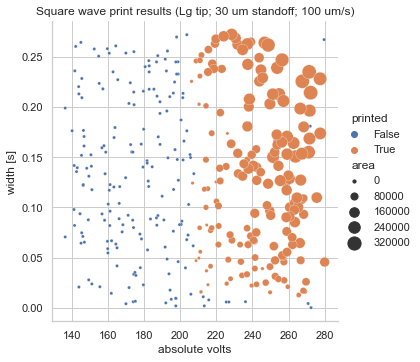

In [18]:
import seaborn as sns


sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df,
    x="absolute volts", y="width [s]",
    hue="printed", size="area",
    sizes=(10, 200),
)
plt.title('Square wave print results (Lg tip; 30 um standoff; 100 um/s)')
plt.savefig('square wave phase plot.png', dpi=1000, bbox_inches='tight', facecolor='w')